Epoch 1/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.4886 - loss: 1.3861 - val_accuracy: 0.7952 - val_loss: 0.5600
Epoch 2/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.7719 - loss: 0.6570 - val_accuracy: 0.8240 - val_loss: 0.4808
Epoch 3/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 26s 64ms/step - accuracy: 0.8106 - loss: 0.5471 - val_accuracy: 0.8360 - val_loss: 0.4352
Epoch 4/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.8291 - loss: 0.4959 - val_accuracy: 0.8533 - val_loss: 0.3963
Epoch 5/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.8455 - loss: 0.4546 - val_accuracy: 0.8616 - val_loss: 0.3728
Epoch 6/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.8593 - loss: 0.4104 - val_accuracy: 0.8679 - val_loss: 0.3603
Epoch 7/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.8627 - loss: 0.3979 - val_accuracy: 0.8746 - val_loss: 0.3496
Epoch 8/40
400/400 ━━━━━━━━━━━━━━━━━━━━ 25s 61ms/step - accuracy: 0.8714 - loss: 0.3755 - 

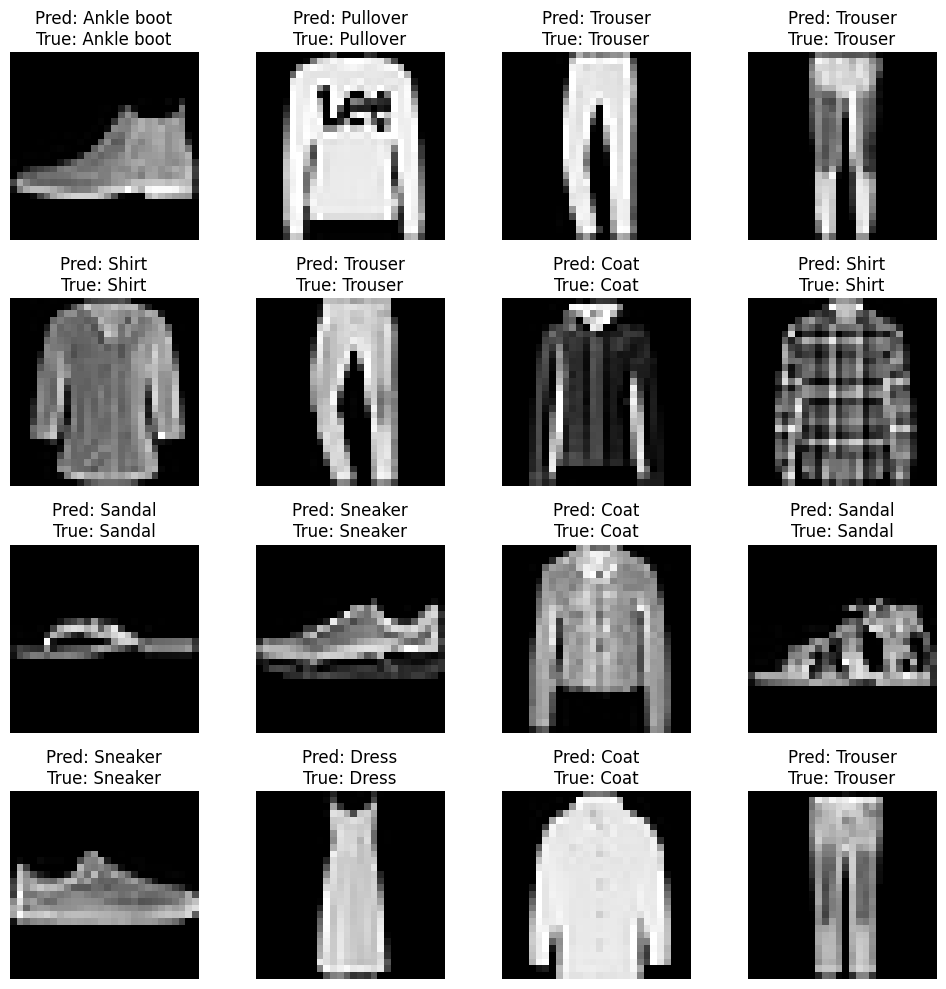

In [8]:
# Importar librerías
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Cargar el conjunto de datos Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Definir los nombres de las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Redimensionar los datos para que tengan un canal adicional (grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalizar los datos a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convertir las etiquetas a formato one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Crear un modelo secuencial
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Capa de aplanamiento (flatten)
model.add(Flatten())

# Primera capa densa
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Segunda capa densa
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida con 10 neuronas (una para cada clase)
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=40, batch_size=120, validation_split=0.2)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', round(test_acc*100,2))

# Clasificar y mostrar resultados para un lote de imágenes
predictions = model.predict(x_test)

# Mostrar las primeras 16 imágenes del conjunto de prueba con sus predicciones
def plot_predictions(images, predictions, true_labels, class_names, num_rows=4, num_cols=4):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(true_labels[i])
        ax.set_title(f"Pred: {class_names[pred_label]}\nTrue: {class_names[true_label]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar predicciones
plot_predictions(x_test, predictions, y_test, class_names)


In [9]:
model.save("clothingModelAINew.keras")